# Cancer Diagnosis using KNN

##### Dataset: http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

##### Description of Dataset:http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names


## What is KNN?

Let x denote a feature (i.e. predictor, attribute) and y to denote the target (i.e. label, class) we are trying to predict.

KNN is a **supervised learning** algorithm.This means that,given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y.Objective is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

The KNN classifier is also a non parametric and instance-based learning algorithm.

**Non-parametric** means it makes no explicit assumptions about the functional form of h, avoiding the dangers of mismodeling the underlying distribution of the data. For example, suppose our data is highly non-Gaussian but the learning model we choose assumes a Gaussian form. In that case, our algorithm would make extremely poor predictions.

**Instance-based** learning means that our algorithm doesn’t explicitly learn a model. Instead, it chooses to memorize the training instances which are subsequently used as “knowledge” for the prediction phase. Concretely, this means that only when a query to our database is made (i.e. when we ask it to predict a label given an input), will the algorithm use the training instances to spit out an answer.

## Purpose is to predict if a tumor is Benign or Malignant

In [205]:
# loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import mglearn
from sklearn import metrics

%matplotlib inline
np.set_printoptions(precision =4,suppress = True)
%matplotlib inline
rcParams['figure.figsize'] = 10,9
plt.style.use('seaborn-whitegrid')

**KNN searches the memorized training observations for the K instances that most closely resemble the new instance and assigns to it the their most common class.**

### Let us assume the blue circles represent the Malignant tumor and the orange triangles represent the Benign tumor. The star  denotes a new sample/data point. When we use KNN to make a prediction or decision or classification of this new data point and we have specified to use 3 neighbors , it will decide whether the new point is Benign or Malignant based on the average of these 3 neighbors. 

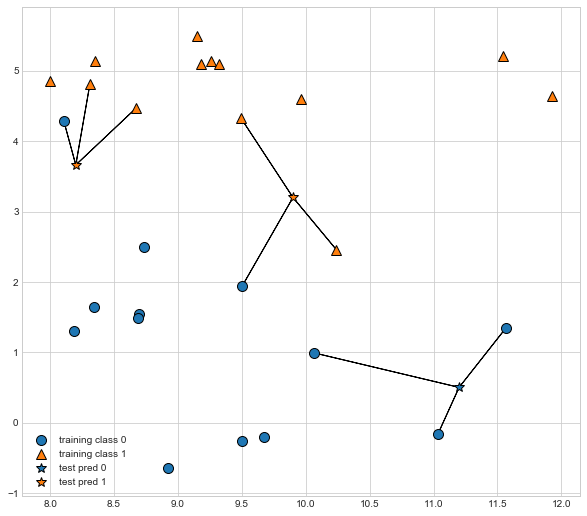

In [161]:
#For k = 3
mglearn.plots.plot_knn_classification(n_neighbors=3)

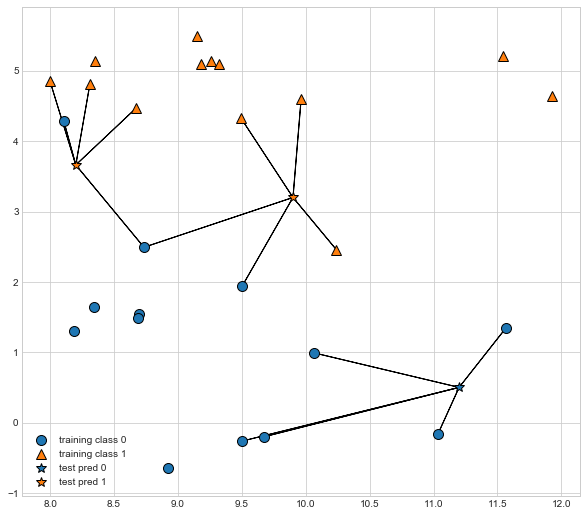

In [162]:
#For k = 5
mglearn.plots.plot_knn_classification(n_neighbors=5)

#### We’ll be using scikit-learn to train a KNN classifier and evaluate its performance on the data set

#### Number of Instances: 699

Each instance has one of 2 possible classes: Benign or Malignant.

#### Class distribution:
Benign: 458 (65.5%)

Malignant: 241 (34.5%)


In [163]:
# Looking into the dataset (not pre-processed like the one that comes with scikit-learn)
import pandas as pd
cancer =pd.read_csv('C:/Users/NIDHI/Desktop/Nidhi/stats & ML/breast-cancer-wisconsin.data.txt', delimiter=',')
cancer.tail(10)

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuceli,bland_chrom,norm_nucleoli,mitoses,class
689,654546,1,1,1,1,2,1,1,1,8,2
690,654546,1,1,1,3,2,1,1,1,1,2
691,695091,5,10,10,5,4,5,4,4,1,4
692,714039,3,1,1,1,2,1,1,1,1,2
693,763235,3,1,1,1,2,1,2,1,2,2
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


** Data Cleaning **

#### Missing attribute values: 16

There are 16 instances in Groups 1 to 6 that contain a single missing (i.e., unavailable) attribute value, now denoted by "?".  

In [164]:
cancer.replace('?','-99999',inplace = True) 
#Replacing '?' with '-99999' as most algorithms treat '-99999' as outlier
cancer.drop(['id'],1,inplace=True)
cancer.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuceli,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


** 2 denotes Benign cancer and 4 denotes Malignant cancer**

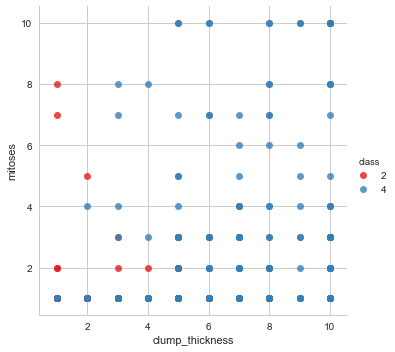

In [213]:
import seaborn as sns
sns.lmplot('clump_thickness', 'mitoses', data=cancer, hue='class', fit_reg=False,palette='Set1')
plt.show()

**scikit - learn** requires that the design matrix **X** and target vector **y** be numpy arrays.Further, we need to split our data into **training and test sets**. The following code does that.

In [165]:
# loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
# create design matrix X and target vector y
X = np.array(cancer.drop(['class'],1))  # end index is exclusive
y = np.array(cancer['class'])           # another way of indexing a pandas df


# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [167]:
# evaluate accuracy
print('Accuracy of KNN n-5, on the training set: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN n-5, on the test set: {:.3f}'.format(knn.score(X_test, y_test)))

Accuracy of KNN n-5, on the training set: 0.975
Accuracy of KNN n-5, on the test set: 0.986


In [168]:
y_expect = y_test
# predict the response
y_pred = knn.predict(X_test)
print(metrics.classification_report(y_expect,y_pred))

             precision    recall  f1-score   support

          2       0.99      0.99      0.99        95
          4       0.98      0.98      0.98        45

avg / total       0.99      0.99      0.99       140



In [169]:
# evaluate accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_expect,y_pred)*100)

98.5714285714


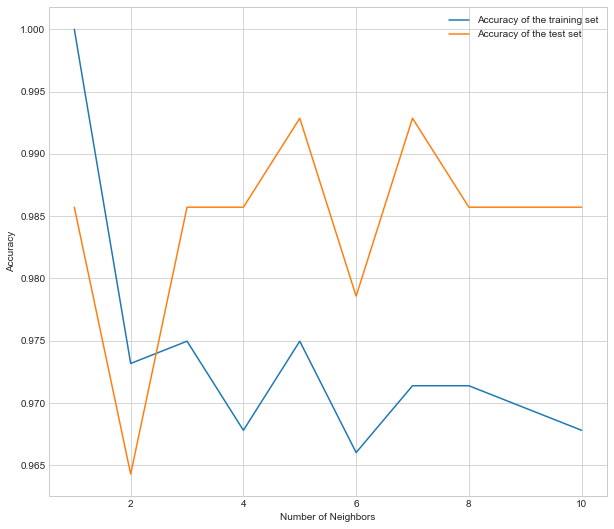

In [177]:
# Resplit the data, with a different randomization (reference by Muller & Guido ML book)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

# Create two lists for training and test accuracies
training_accuracy = []
test_accuracy = []

# Define a range of 1 to 10 (included) neighbors to be tested
neighbors_settings = range(1,11)

# Loop with the KNN through the different number of neighbors to determine the most appropriate (best)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Visualize results - to help with deciding which n_neigbors yields the best results (n_neighbors=6, in this case)
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

# CROSS VALIDATION

Cross-validation can be used to estimate the test error associated with a learning method in order to evaluate its performance, or to select the appropriate level of flexibility.

A smarter approach involves estimating the test error rate by holding out a subset of the training set from the fitting process. This subset, called the validation set, can be used to select the appropriate level of flexibility of our algorithm. There are different validation approaches that are used in practice, and one of the most popular one is the **k-fold cross validation.**

**k-fold cross validation** involves randomly dividing the training set into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining **k−1** folds. The misclassification rate is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in **k** estimates of the test error which are then averaged out.

scikit-learn is useful with its **cross_val_score() method**. We specifiy that we are performing 10 folds with the cv=10 parameter and that our scoring metric should be accuracy since we are in a classification setting.

Finally, we plot the misclassification error versus K.


The optimal number of neighbors is 7.


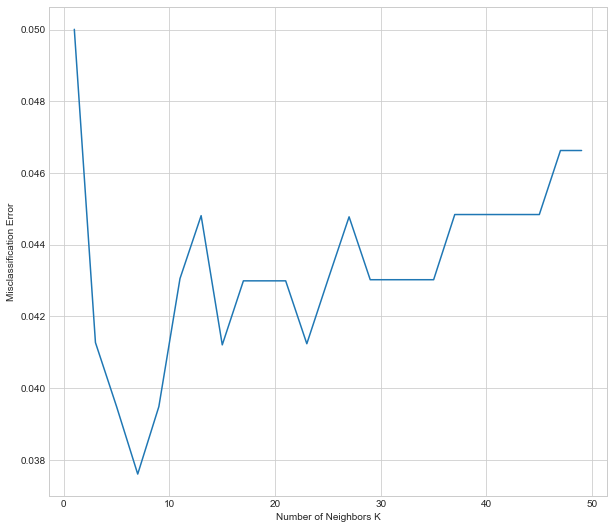

In [178]:
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#### 10-fold cross validation tells us that K=7 results in the lowest validation error

### Evaluating estimator performance
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. 

In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split helper function. Let’s load the cancer data set to fit a linear support vector machine on it:

In [172]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
knn = svm.SVC(kernel='linear', C=1)

scores = cross_val_score(knn, X, y, cv=2)

scores

array([ 0.92  ,  0.9685])

In [173]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.05)


In [183]:
from sklearn import metrics
scores = cross_val_score(knn, X, y, cv=7, scoring='f1_macro')
scores

array([ 0.8569,  0.9533,  0.9761,  0.9758,  0.992 ])

In [184]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.10)


**REFERENCES:**
1. https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
2. https://youtu.be/tPJaNmN1XQs
3. https://youtu.be/1i0zu9jHN6U